# **🍽️ Restaurant Tips Analysis**

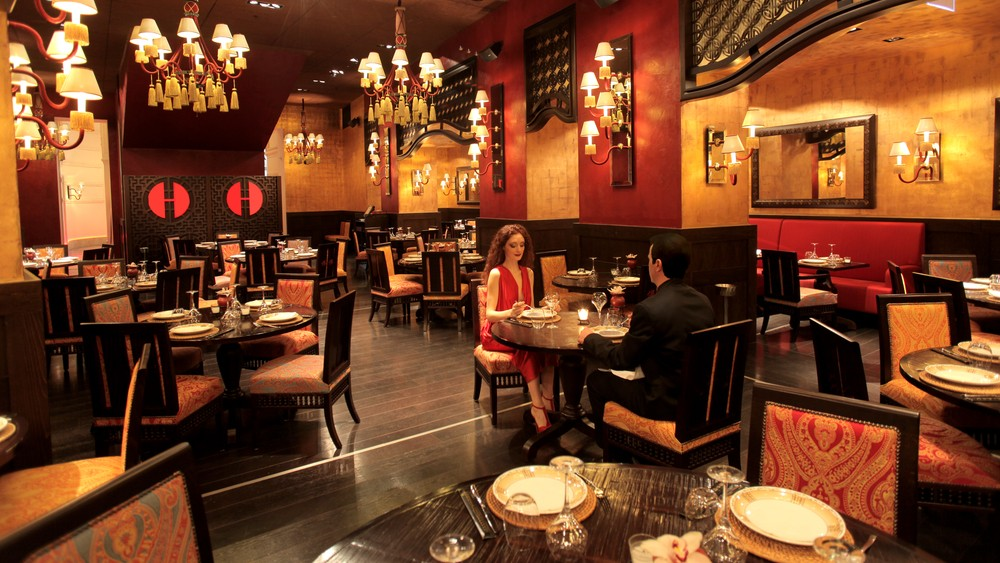

This project aims to use the restaurant tips dataset to practice creating composition plots and visualizations. We will examine the relationship between different variables and the tips given.

The dataset consists of information from 244 restaurant bills, collected in the US in 1987.

It includes details about the tips given to restaurant staff, such as the total bill, tip amount, gender of the person paying, smoking status, day of the week, time of day, and party size.

## **👣 The First Steps**

### **📥 Data import**

First, let's import the needed libraries: Pandas & Matplotlib.

In [13]:
# PUT YOUR CODE HERE
import pandas as pd
import matplotlib.pyplot as plt

Then load data from the following link: https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv

In [14]:
# PUT YOUR CODE HERE
df = pd.read_csv('https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv')

### **🔍 Data exploration**

#### **Test sample**

Let's take a look at the first 5 rows to be sure, that data is loaded properly:

In [15]:
# PUT YOUR CODE HERE
df.head()

,id,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


> 🎉 Great! It seems to be okay.

As you can see each observation represents a customer who left a tip at a restaurant.

We can see information about:
* the day it occurred
* if it was at lunch or dinner
* the total bill
* the sex of the person
* if they were a smoker or not
* the size of the party

Before continuing take a look at a few rows of the data and use `info` and `describe` to analyze dataset column types and values.

#### **Column types checking**

Show the columns of the dataframe and their types:

In [16]:
# PUT YOUR CODE HERE
df.describe()

,id,total_bill,tip,size
count,244.000000,244.000000,244.000000,244.000000
mean,121.500000,19.785943,2.998279,2.569672
std,70.580923,8.902412,1.383638,0.951100
min,0.000000,3.070000,1.000000,1.000000
25%,60.750000,13.347500,2.000000,2.000000
50%,121.500000,17.795000,2.900000,2.000000
75%,182.250000,24.127500,3.562500,3.000000
max,243.000000,50.810000,10.000000,6.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


> **Ooops... 🤔**
>
> We have string columns considered as objects.

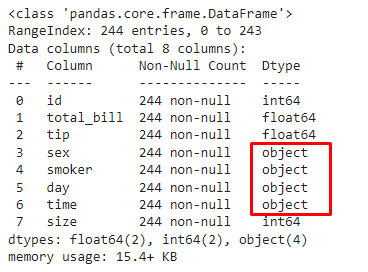

Let's fix their types and make them string:

In [18]:
# PUT YOUR CODE HERE
df1 = df.convert_dtypes()

Check again (output columns and their types):

In [19]:
# PUT YOUR CODE HERE
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    Int64  
 1   total_bill  244 non-null    Float64
 2   tip         244 non-null    Float64
 3   sex         244 non-null    string 
 4   smoker      244 non-null    string 
 5   day         244 non-null    string 
 6   time        244 non-null    string 
 7   size        244 non-null    Int64  
dtypes: Float64(2), Int64(2), string(4)
memory usage: 16.3 KB


Nice! We finished this. Look like we are ready to explore some statistics on the given data.

#### **Basic descriptive statistics**

Show a descriptive statistics of the numeric columns:

In [28]:
# PUT YOUR CODE HERE
df1.describe()

,id,total_bill,tip,size
count,244.0,244.0,244.0,244.0
mean,121.5,19.785943,2.998279,2.569672
std,70.580923,8.902412,1.383638,0.9511
min,0.0,3.07,1.0,1.0
25%,60.75,13.3475,2.0,2.0
50%,121.5,17.795,2.9,2.0
75%,182.25,24.1275,3.5625,3.0
max,243.0,50.81,10.0,6.0


Great! Now we know a little more about our data.

➡️ Let's move forward!

## **💸 Tip value influencers**

### **🚬 Do people who smoke give more tips?**

Let's figure out the difference between smokers and non-smokers in terms of their behavior and purchasing habits in public catering establishments.

#### **Separate smokers and non-smokers**

Create a new dataframe `smokers_df` containing only info about smokers.

In [29]:
# PUT YOUR CODE HERE
smokers_df = df1.query('smoker == "Yes"')

Check whether everything is okay. Output a test sample (5 random rows):

In [30]:
# PUT YOUR CODE HERE
smokers_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
216,216,28.15,3.0,Male,Yes,Sat,Dinner,5
206,206,26.59,3.41,Male,Yes,Sat,Dinner,3
170,170,50.81,10.0,Male,Yes,Sat,Dinner,3
229,229,22.12,2.88,Female,Yes,Sat,Dinner,2
234,234,15.53,3.0,Male,Yes,Sat,Dinner,2


Also create another one dataframe `non_smokers_df` containing only non-smokers.

In [32]:
# PUT YOUR CODE HERE
non_smokers_df = df1.query('smoker == "No"')

Check whether everything is okay. Output a test sample (5 random rows):

In [33]:
# PUT YOUR CODE HERE
non_smokers_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
165,165,24.52,3.48,Male,No,Sun,Dinner,3
32,32,15.06,3.0,Female,No,Sat,Dinner,2
17,17,16.29,3.71,Male,No,Sun,Dinner,3
71,71,17.07,3.0,Female,No,Sat,Dinner,3
110,110,14.0,3.0,Male,No,Sat,Dinner,2


#### **Compare their measures of central tendency**

As we know, measures of central tendency is one of the basic tools, that allow us to compare different datasets as it shows the most typical values.

##### **🌏 Whole dataset**

Let's try to calculate measures of central tendency for the whole dataset first.

Calculate them for the **'tip'** column through the whole dataset and save them into the following variables:

* min => `common_tip_min`
* max => `common_tip_max`
* mean => `common_tip_mean`
* median => `common_tip_median`

In [34]:
# YOUR CODE
common_tip_min = df1.tip.min()
common_tip_max = df1.tip.max()
common_tip_mean = df1.tip.mean()
common_tip_median = df1.tip.median()

Let's show the resulting values for whole dataset (we already have the code written for you 😉)

In [35]:
# Make a list of values
common_values = [common_tip_min, common_tip_max, common_tip_mean, common_tip_median]
# Round all the values to 4 decimal places
common_values = map(lambda x: round(x, 4), common_values)

# Make a dataframe from the list
common_mct = pd.DataFrame(common_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
common_mct

,0
min,1.0000
max,10.0000
mean,2.9983
median,2.9000


##### **🚬 Smokers**

Do the same taking into account only smokers. Use the following variables:

* min => `smokers_tip_min`
* max => `smokers_tip_max`
* mean => `smokers_tip_mean`
* median => `smokers_tip_median`

In [36]:
# YOUR CODE
smokers_tip_min = smokers_df.tip.min()
smokers_tip_max = smokers_df.tip.max()
smokers_tip_mean = smokers_df.tip.mean()
smokers_tip_median = smokers_df.tip.median()

Let's output the results in the same format.

Make the same dataframe containing the measures of central tendency for smokers as we did for whole dataset. Then output it.

In [40]:
# YOUR CODE
# Make a list of values
smokers_values = [smokers_tip_min, smokers_tip_max, smokers_tip_mean, smokers_tip_median]
# Round all the values to 4 decimal places
smokers_values = map(lambda x: round(x, 4), smokers_values)

# Make a dataframe from the list
smokers_mct = pd.DataFrame(smokers_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
smokers_mct

,0
min,1.0000
max,10.0000
mean,3.0087
median,3.0000


##### **🚭 Non-smokers**

Now repeat it for non-smokers. Use the following variables:

* min => `non_smokers_tip_min`
* max => `non_smokers_tip_max`
* mean => `non_smokers_tip_mean`
* median => `non_smokers_tip_median`

In [41]:
# YOUR CODE
non_smokers_tip_min = non_smokers_df.tip.min()
non_smokers_tip_max = non_smokers_df.tip.max()
non_smokers_tip_mean = non_smokers_df.tip.mean()
non_smokers_tip_median = non_smokers_df.tip.median()

Make the same dataframe containing the measures of central tendency for non-smokers as we did for whole dataset. Then output it.

In [42]:
# YOUR CODE
# Make a list of values
non_smokers_values = [non_smokers_tip_min, non_smokers_tip_max, non_smokers_tip_mean, non_smokers_tip_median]
# Round all the values to 4 decimal places
non_smokers_values = map(lambda x: round(x, 4), non_smokers_values)

# Make a dataframe from the list
non_smokers_mct = pd.DataFrame(non_smokers_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
non_smokers_mct

,0
min,1.0000
max,9.0000
mean,2.9919
median,2.7400


##### **📝 Conclusion**

Let's show the retrieved results together (we already have the code written for you 😉):

In [44]:
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Smokers': {'min': smokers_tip_min, 'max': smokers_tip_max, 'mean': smokers_tip_mean, 'median': smokers_tip_median},
    'Non-smokers': {'min': non_smokers_tip_min, 'max': non_smokers_tip_max, 'mean': non_smokers_tip_mean, 'median': non_smokers_tip_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,Smokers,Non-smokers
min,1.000000,1.00000,1.000000
max,10.000000,10.00000,9.000000
mean,2.998279,3.00871,2.991854
median,2.900000,3.00000,2.740000


**Insights based on measures of central tendency comparison:**

---

1. Insight 1

The average tip (mean) for smokers (3.0087) is slightly higher than for the entire dataset (2.9983) and non-smokers (2.9919).
2. Insight 2

The median tip (median) for smokers (3.0000) is also higher than for the entire dataset (2.9000) and non-smokers (2.7400).


**General conclusion:**

Based on the measures of central tendency, it appears that smokers tend to tip slightly more than non-smokers, although the difference is not large.

#### **Look at histograms**

As we already discussed on the last lecture, there are a lot of cases, when comparing the measures of central tendency is not enough.

This is because they only show the most typical values. However, the way data is distributed is equally important. There are situations where measures of central tendency are exactly the same, but due to different distributions, it is incorrect to say that the datasets are similar.

##### **🌏 Whole dataset tips histogram**

Plot the histogram for the whole dataset tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#74b9ff`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Whole dataset tip values`
* Gridlines: `show`

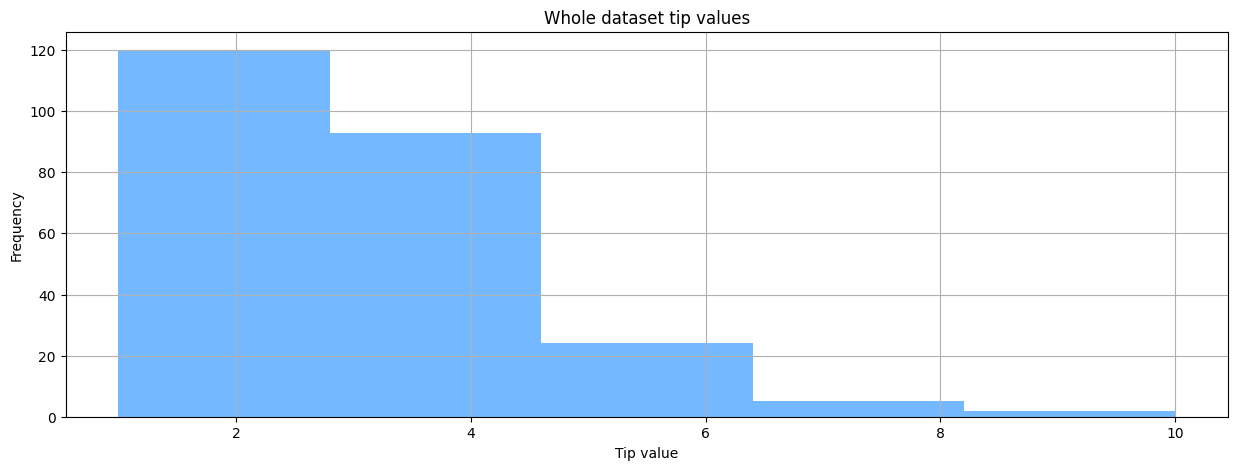

In [49]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(df1['tip'], bins = 5, color='#74b9ff')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')
plt.grid(True)
plt.show()

##### **🚬 Smokers tips histogram**

Plot the histogram for smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#ff7675`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Smokers tip values`
* Gridlines: `show`

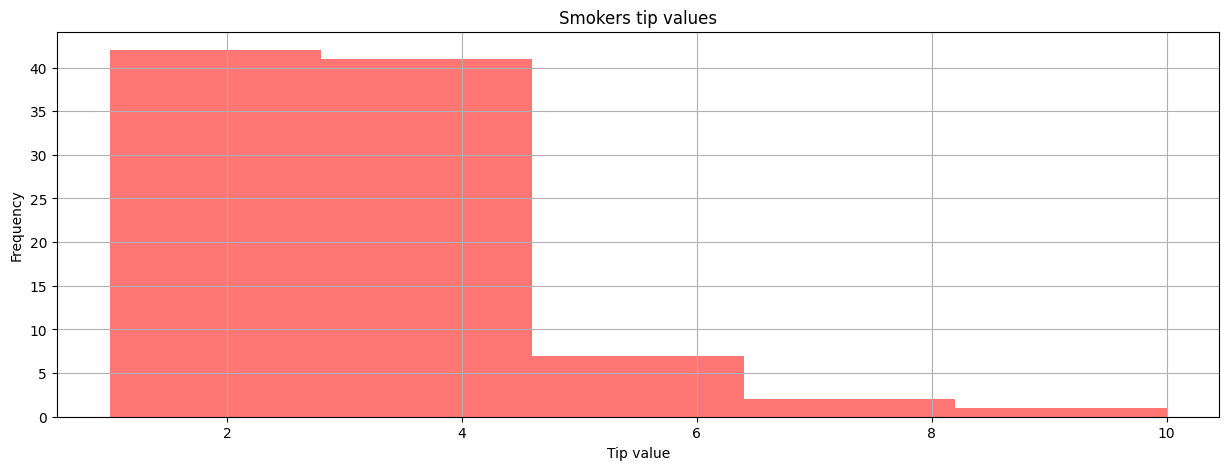

In [57]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(smokers_df['tip'], bins = 5, color='#ff7675')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Smokers tip values')
plt.grid(True)
plt.show()

##### **🚭 Non-smokers tips histogram**

Plot the histogram for non-smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#55efc4`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Non-smokers tip values`
* Gridlines: `show`

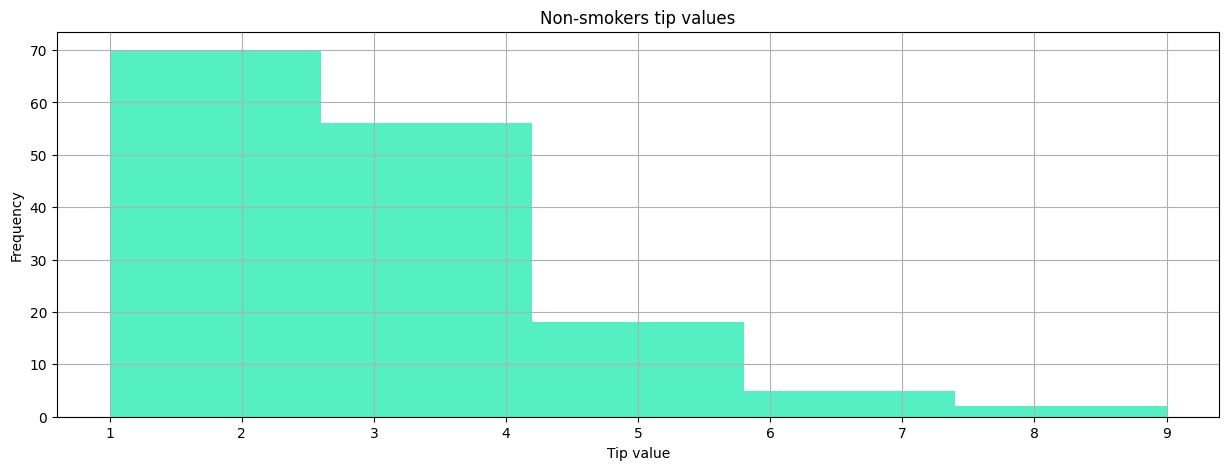

In [56]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(non_smokers_df['tip'], bins = 5, color='#55efc4')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Non-smokers tip values')
plt.grid(True)
plt.show()

##### **⭐ Extra-task with a higher difficulty**

Plot all 3 charts in a row in the same cell:

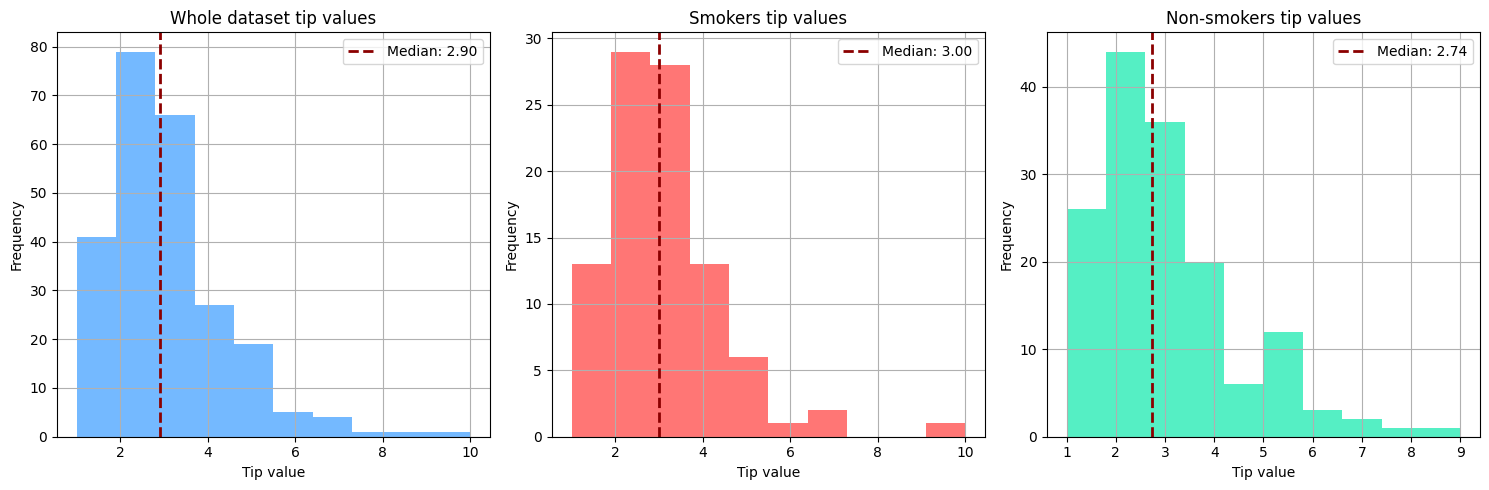

In [61]:
# YOUR CODE
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1) # 1 row, 3 columns, 1st plot
plt.hist(df1['tip'], color='#74b9ff')
plt.axvline(common_tip_median, color='darkred', linestyle='dashed', linewidth=2, label=f'Median: {common_tip_median:.2f}') # Add median line with label
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')
plt.grid(True)
plt.legend() # Add legend

plt.subplot(1, 3, 2) # 1 row, 3 columns, 2nd plot
plt.hist(smokers_df['tip'], color='#ff7675')
plt.axvline(smokers_tip_median, color='darkred', linestyle='dashed', linewidth=2, label=f'Median: {smokers_tip_median:.2f}') # Add median line with label
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Smokers tip values')
plt.grid(True)
plt.legend() # Add legend

plt.subplot(1, 3, 3) # 1 row, 3 columns, 3rd plot
plt.hist(non_smokers_df['tip'], color='#55efc4')
plt.axvline(non_smokers_tip_median, color='darkred', linestyle='dashed', linewidth=2, label=f'Median: {non_smokers_tip_median:.2f}') # Add median line with label
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Non-smokers tip values')
plt.grid(True)
plt.legend() # Add legend


plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

##### **📝 Conclusion**

**Insights based on distribution comparison:**

---

1. Insight 1

All three tip distributions (whole dataset, smokers, non-smokers) are right-skewed. This means that the majority of customers give lower tips, and a small number of customers give very high tips, pulling the tail of the chart to the right.

2. Insight 2

The median line (dashed red line) shows that the median tip value for smokers (3.00) is slightly higher than for the entire dataset (2.90) and notably higher than for non-smokers (2.74). This reinforces the conclusion from the comparison of central tendencies earlier.


**General conclusion:**

In summary, based on the distribution and the position of the median line, it appears that in this dataset, smokers tend to give slightly higher average and median tips compared to non-smokers. Although both groups have a right-skewed tip distribution, the smokers group might have a slightly higher proportion of customers giving very high tips. However, the overall difference in tipping behavior between these two groups does not seem very large.

### **👨👩 Do males give more tips?**

Let's figure out the difference between males and females in terms of their behavior and purchasing habits in public catering establishments.

#### **Separate males and females**

Create a new dataframe `males_df` containing only info about smokers.

In [88]:
# PUT YOUR CODE HERE
males_df = df1.query('sex == "Male"')

Check whether everything is okay. Output a test sample (5 random rows):

In [89]:
# PUT YOUR CODE HERE
males_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
1,1,10.34,1.66,Male,No,Sun,Dinner,3
98,98,21.01,3.0,Male,Yes,Fri,Dinner,2
207,207,38.73,3.0,Male,Yes,Sat,Dinner,4
241,241,22.67,2.0,Male,Yes,Sat,Dinner,2
20,20,17.92,4.08,Male,No,Sat,Dinner,2


Also create another one dataframe `females_df` containing only non-smokers.

In [90]:
# PUT YOUR CODE HERE
females_df = df1.query('sex == "Female"')

Check whether everything is okay. Output a test sample (5 random rows):

In [91]:
# PUT YOUR CODE HERE
females_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
238,238,35.83,4.67,Female,No,Sat,Dinner,3
102,102,44.3,2.5,Female,Yes,Sat,Dinner,3
100,100,11.35,2.5,Female,Yes,Fri,Dinner,2
127,127,14.52,2.0,Female,No,Thur,Lunch,2
101,101,15.38,3.0,Female,Yes,Fri,Dinner,2


#### **Compare their measures of central tendency**

As we know, measures of central tendency is one of the basic tools, that allow us to compare different datasets as it shows the most typical values.

##### **🌏 Whole dataset**

Let's try to calculate measures of central tendency for the whole dataset first.

Calculate them for the **'tip'** column through the whole dataset and save them into the following variables:

* min => `common_tip_min`
* max => `common_tip_max`
* mean => `common_tip_mean`
* median => `common_tip_median`

In [92]:
# YOUR CODE
common_tip_min = df1.tip.min()
common_tip_max = df1.tip.max()
common_tip_mean = df1.tip.mean()
common_tip_median = df1.tip.median()

Let's show the resulting values for whole dataset (we already have the code written for you 😉)

In [93]:
# Make a list of values
common_values = [common_tip_min, common_tip_max, common_tip_mean, common_tip_median]
# Round all the values to 4 decimal places
common_values = map(lambda x: round(x, 4), common_values)

# Make a dataframe from the list
common_mct = pd.DataFrame(common_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
common_mct

,0
min,1.0000
max,10.0000
mean,2.9983
median,2.9000


##### **👨 Males**

Do the same taking into account only smokers. Use the following variables:

* min => `males_tip_min`
* max => `males_tip_max`
* mean => `males_tip_mean`
* median => `males_tip_median`

In [94]:
# YOUR CODE
males_tip_min = males_df.tip.min()
males_tip_max = males_df.tip.max()
males_tip_mean = males_df.tip.mean()
males_tip_median = males_df.tip.median()

Let's output the results in the same format.

Make the same dataframe containing the measures of central tendency for smokers as we did for whole dataset. Then output it.

In [95]:
# YOUR CODE
# Make a list of values
males_values = [males_tip_min, males_tip_max, males_tip_mean, males_tip_median]
# Round all the values to 4 decimal places
males_values = map(lambda x: round(x, 4), males_values)

# Make a dataframe from the list
males_mct = pd.DataFrame(males_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
males_mct

,0
min,1.0000
max,10.0000
mean,3.0896
median,3.0000


##### **👩 Females**

Now repeat it for non-smokers. Use the following variables:

* min => `females_tip_min`
* max => `females_tip_max`
* mean => `females_tip_mean`
* median => `females_tip_median`

In [96]:
# YOUR CODE
females_tip_min = females_df.tip.min()
females_tip_max = females_df.tip.max()
females_tip_mean = females_df.tip.mean()
females_tip_median = females_df.tip.median()

Make the same dataframe containing the measures of central tendency for non-smokers as we did for whole dataset. Then output it.

In [97]:
# YOUR CODE
# Make a list of values
females_values = [females_tip_min, females_tip_max, females_tip_mean, females_tip_median]
# Round all the values to 4 decimal places
females_values = map(lambda x: round(x, 4), females_values)

# Make a dataframe from the list
females_mct = pd.DataFrame(females_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
females_mct

,0
min,1.0000
max,6.5000
mean,2.8334
median,2.7500


##### **📝 Conclusion**

Let's show the retrieved results together (we already have the code written for you 😉):

In [98]:
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Males': {'min': males_tip_min, 'max': males_tip_max, 'mean': males_tip_mean, 'median': males_tip_median},
    'Females': {'min': females_tip_min, 'max': females_tip_max, 'mean': females_tip_mean, 'median': females_tip_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,Males,Females
min,1.000000,1.000000,1.000000
max,10.000000,10.000000,6.500000
mean,2.998279,3.089618,2.833448
median,2.900000,3.000000,2.750000


**Insights based on measures of central tendency comparison:**

---

1. Insight 1

The average tip (mean) for males (3.0896) is higher than for the entire dataset (2.9983) and for females (2.8334).

2. Insight 2

The maximum tip amount (max) for males (10.00) is significantly higher than for females (6.50).


**General conclusion:**

Based on the measures of central tendency, it appears that males tend to tip higher on average and in terms of the median compared to females in this dataset. Additionally, males also have instances of very high tips, surpassing those of females.

#### **Look at histograms**

##### **🌏 Whole dataset tips histogram**

Plot the histogram for the whole dataset tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#74b9ff`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Whole dataset tip values`
* Gridlines: `show`

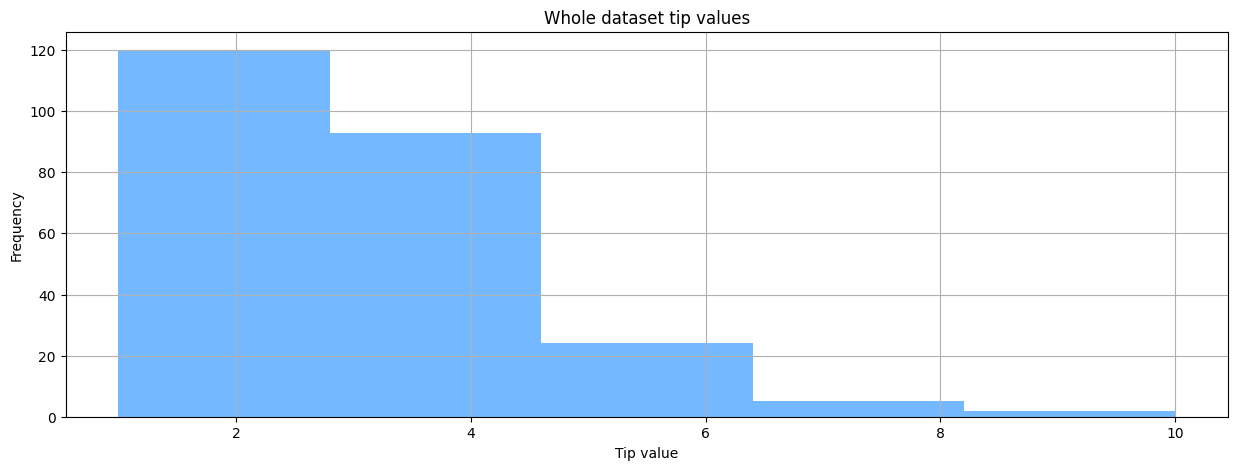

In [99]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(df1['tip'],bins = 5, color='#74b9ff')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')
plt.grid(True)
plt.show()

##### **👨 Males tips histogram**

Plot the histogram for males tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#ff7675`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Males tip values`
* Gridlines: `show`

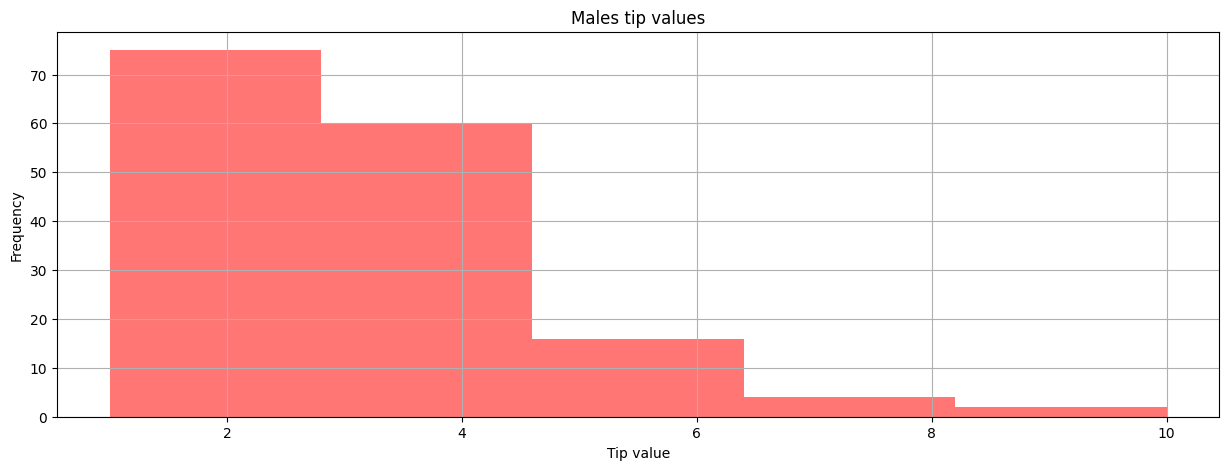

In [100]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(males_df['tip'],bins = 5, color='#ff7675')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Males tip values')
plt.grid(True)
plt.show()

##### **👩 Females tips histogram**

Plot the histogram for non-smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#55efc4`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Females tip values`
* Gridlines: `show`

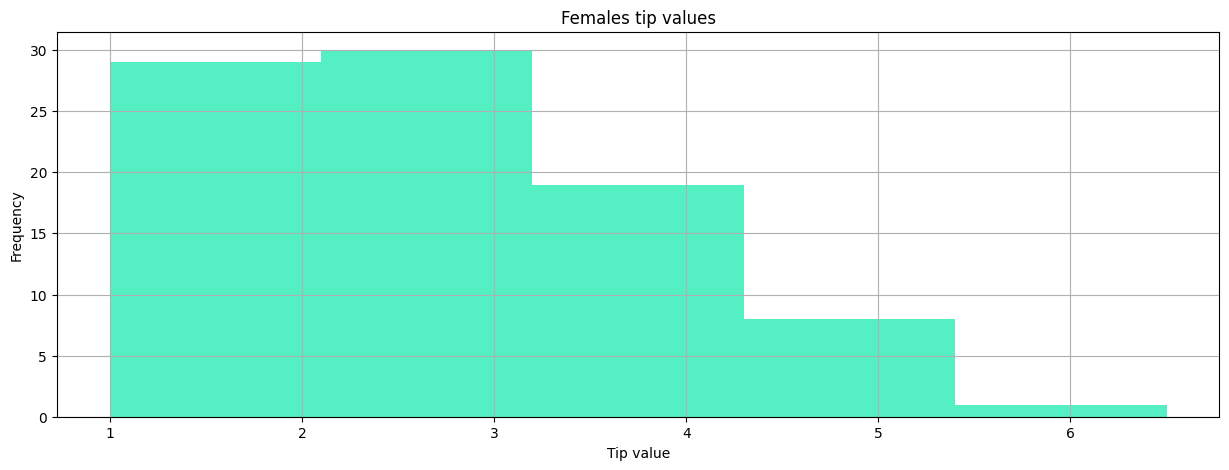

In [101]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(females_df['tip'],bins = 5, color='#55efc4')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Females tip values')
plt.grid(True)
plt.show()

##### **⭐ Extra-task with a higher difficulty**

Plot all 3 charts in a row in the same cell:

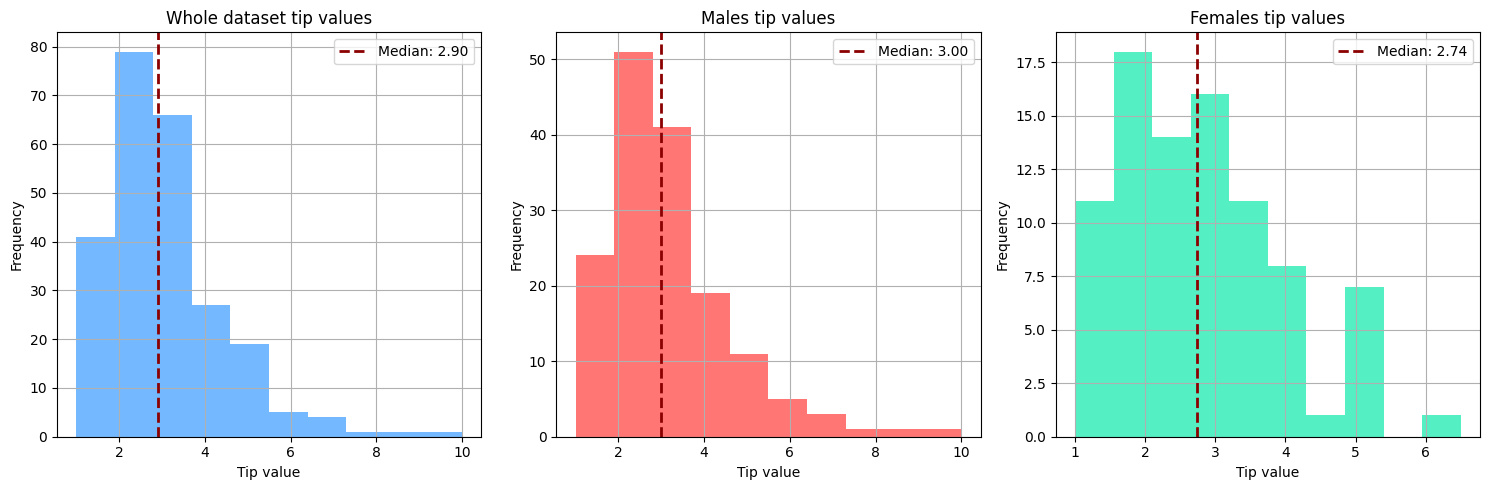

In [102]:
# YOUR CODE
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1) # 1 row, 3 columns, 1st plot
plt.hist(df1['tip'], color='#74b9ff')
plt.axvline(common_tip_median, color='darkred', linestyle='dashed', linewidth=2, label=f'Median: {common_tip_median:.2f}') # Add median line with label
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')
plt.grid(True)
plt.legend() # Add legend

plt.subplot(1, 3, 2) # 1 row, 3 columns, 2nd plot
plt.hist(males_df['tip'], color='#ff7675')
plt.axvline(smokers_tip_median, color='darkred', linestyle='dashed', linewidth=2, label=f'Median: {smokers_tip_median:.2f}') # Add median line with label
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Males tip values')
plt.grid(True)
plt.legend() # Add legend

plt.subplot(1, 3, 3) # 1 row, 3 columns, 3rd plot
plt.hist(females_df['tip'], color='#55efc4')
plt.axvline(non_smokers_tip_median, color='darkred', linestyle='dashed', linewidth=2, label=f'Median: {non_smokers_tip_median:.2f}') # Add median line with label
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Females tip values')
plt.grid(True)
plt.legend() # Add legend


plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

##### **📝 Conclusion**

**Insights based on distribution comparison:**

---

1. Insight 1

Although both groups have a right-skewed distribution, the males' histogram appears to have a wider spread towards higher tip values compared to females.

2. Insight 2

Similar to the comparison with smokers/non-smokers, all three tip distributions (whole dataset, males, females) are right-skewed. This indicates that the majority of tips are at lower values, with a small number of higher tip amounts.


**General conclusion:**

In summary, based on the distribution and median position, males tend to give higher average and median tips than females.

### **📆 Do weekends bring more tips?**

Let's figure out the difference in tipping behavior across different days of the week, especially comparing weekdays to weekends.

#### **Separate data by day**

Create new dataframes for each day of the week: 'Thur', 'Fri', 'Sat', 'Sun'.

In [103]:
# Create dataframes for each day
thur_df = df1.query('day == "Thur"')
fri_df = df1.query('day == "Fri"')
sat_df = df1.query('day == "Sat"')
sun_df = df1.query('day == "Sun"')

# Display a sample from each dataframe to verify
print("Thursday sample:")
display(thur_df.sample(3))

print("\nFriday sample:")
display(fri_df.sample(3))

print("\nSaturday sample:")
display(sat_df.sample(3))

print("\nSunday sample:")
display(sun_df.sample(3))

Thursday sample:


,id,total_bill,tip,sex,smoker,day,time,size
83,83,32.68,5.0,Male,Yes,Thur,Lunch,2
204,204,20.53,4.0,Male,Yes,Thur,Lunch,4
142,142,41.19,5.0,Male,No,Thur,Lunch,5



Friday sample:


,id,total_bill,tip,sex,smoker,day,time,size
94,94,22.75,3.25,Female,No,Fri,Dinner,2
90,90,28.97,3.0,Male,Yes,Fri,Dinner,2
91,91,22.49,3.5,Male,No,Fri,Dinner,2



Saturday sample:


,id,total_bill,tip,sex,smoker,day,time,size
68,68,20.23,2.01,Male,No,Sat,Dinner,2
168,168,10.59,1.61,Female,Yes,Sat,Dinner,2
64,64,17.59,2.64,Male,No,Sat,Dinner,3



Sunday sample:


,id,total_bill,tip,sex,smoker,day,time,size
1,1,10.34,1.66,Male,No,Sun,Dinner,3
188,188,18.15,3.5,Female,Yes,Sun,Dinner,3
46,46,22.23,5.0,Male,No,Sun,Dinner,2


#### **Compare their measures of central tendency**

Calculate the measures of central tendency (min, max, mean, median) for the 'tip' column for each day ('Thur', 'Fri', 'Sat', 'Sun').

In [107]:
# Calculate measures of central tendency for each day
thur_tip_min = thur_df.tip.min()
thur_tip_max = thur_df.tip.max()
thur_tip_mean = thur_df.tip.mean()
thur_tip_median = thur_df.tip.median()

fri_tip_min = fri_df.tip.min()
fri_tip_max = fri_df.tip.max()
fri_tip_mean = fri_df.tip.mean()
fri_tip_median = fri_df.tip.median()

sat_tip_min = sat_df.tip.min()
sat_tip_max = sat_df.tip.max()
sat_tip_mean = sat_df.tip.mean()
sat_tip_median = sat_df.tip.median()

sun_tip_min = sun_df.tip.min()
sun_tip_max = sun_df.tip.max()
sun_tip_mean = sun_df.tip.mean()
sun_tip_median = sun_df.tip.median()

Show the calculated measures of central tendency for each day.

In [108]:
# Create a dictionary with the calculated values
daily_mct_dict = {
    'Thur': {'min': thur_tip_min, 'max': thur_tip_max, 'mean': thur_tip_mean, 'median': thur_tip_median},
    'Fri': {'min': fri_tip_min, 'max': fri_tip_max, 'mean': fri_tip_mean, 'median': fri_tip_median},
    'Sat': {'min': sat_tip_min, 'max': sat_tip_max, 'mean': sat_tip_mean, 'median': sat_tip_median},
    'Sun': {'min': sun_tip_min, 'max': sun_tip_max, 'mean': sun_tip_mean, 'median': sun_tip_median}
}

# Make a dataframe from the dictionary
daily_mct_df = pd.DataFrame(daily_mct_dict)

# Display the dataframe
display(daily_mct_df)

,Thur,Fri,Sat,Sun
min,1.250000,1.000000,1.000000,1.010000
max,6.700000,4.730000,10.000000,6.500000
mean,2.771452,2.734737,2.993103,3.255132
median,2.305000,3.000000,2.750000,3.150000


#### **Look at histograms**

Plot the histogram for each day's tip distribution, including median lines and legends.

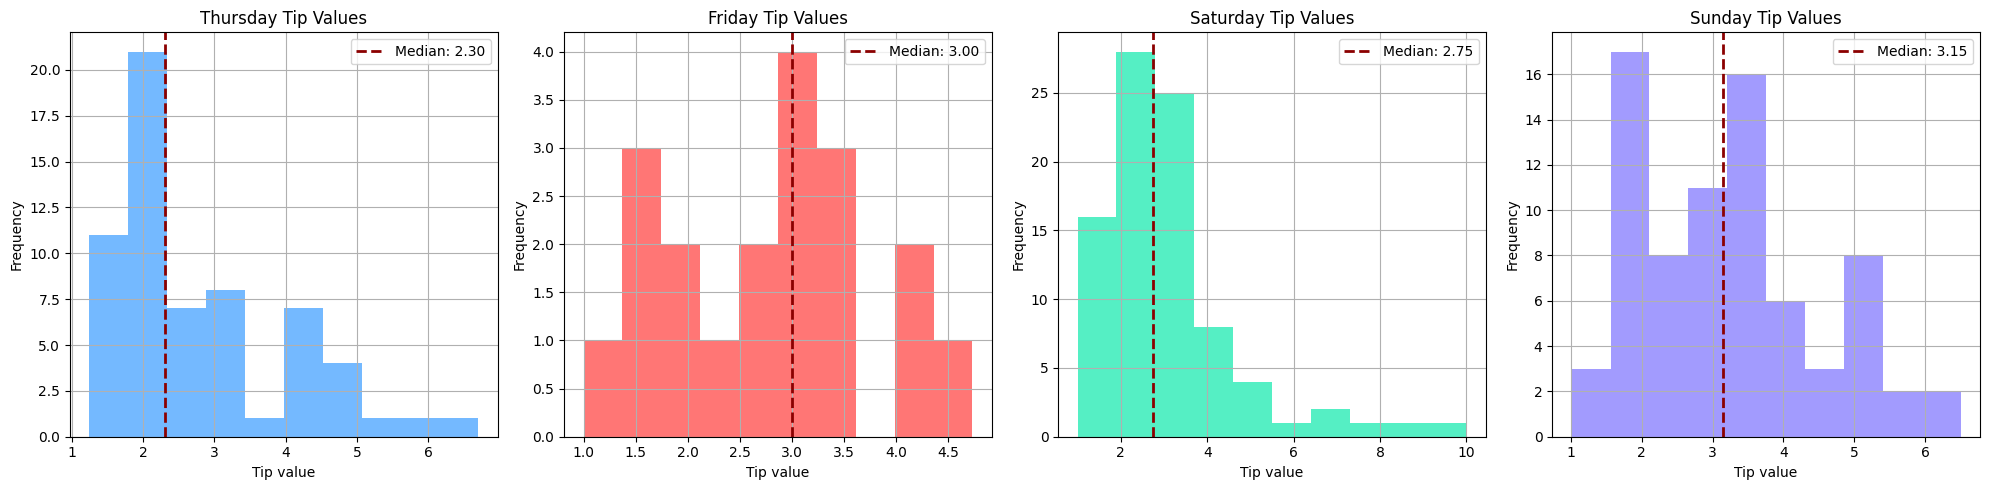

In [106]:
plt.figure(figsize=(20, 5)) # Adjust figure size to accommodate 4 plots

plt.subplot(1, 4, 1) # 1 row, 4 columns, 1st plot
plt.hist(thur_df['tip'], color='#74b9ff')
plt.axvline(thur_tip_median, color='darkred', linestyle='dashed', linewidth=2, label=f'Median: {thur_tip_median:.2f}')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Thursday Tip Values')
plt.grid(True)
plt.legend()

plt.subplot(1, 4, 2) # 1 row, 4 columns, 2nd plot
plt.hist(fri_df['tip'], color='#ff7675')
plt.axvline(fri_tip_median, color='darkred', linestyle='dashed', linewidth=2, label=f'Median: {fri_tip_median:.2f}')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Friday Tip Values')
plt.grid(True)
plt.legend()

plt.subplot(1, 4, 3) # 1 row, 4 columns, 3rd plot
plt.hist(sat_df['tip'], color='#55efc4')
plt.axvline(sat_tip_median, color='darkred', linestyle='dashed', linewidth=2, label=f'Median: {sat_tip_median:.2f}')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Saturday Tip Values')
plt.grid(True)
plt.legend()

plt.subplot(1, 4, 4) # 1 row, 4 columns, 4th plot
plt.hist(sun_df['tip'], color='#a29bfe') # Using a different color for Sunday
plt.axvline(sun_tip_median, color='darkred', linestyle='dashed', linewidth=2, label=f'Median: {sun_tip_median:.2f}')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Sunday Tip Values')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

##### **📝 Conclusion**

**Insights based on measures of central tendency and distribution comparison:**

* * *

1. Insight 1:

Mean and median tips are highest on Sunday and Saturday, lower on Thursday and Friday.

2. Insight 2:

The highest maximum tip occurs on Saturday.

3. Insight 3:

Saturday and Sunday histograms show a wider spread towards higher tips compared to Thursday and Friday, all are right-skewed.

**General conclusion:**

Weekends (Saturday and Sunday) tend to yield higher average and median tips than weekdays, with a higher potential for very large tips on Saturday.

### **🕑 Do dinners bring more tips?**

Let's figure out the difference in tipping behavior between Lunch and Dinner times.

#### **Separate data by time**

Create new dataframes for 'Lunch' and 'Dinner'.

In [118]:
# Create dataframes for Lunch and Dinner
lunch_df = df1.query('time == "Lunch"')
dinner_df = df1.query('time == "Dinner"')

# Display a sample from each dataframe to verify
print("Lunch sample:")
display(lunch_df.sample(3))

print("\nDinner sample:")
display(dinner_df.sample(3))

Lunch sample:


,id,total_bill,tip,sex,smoker,day,time,size
84,84,15.98,2.03,Male,No,Thur,Lunch,2
222,222,8.58,1.92,Male,Yes,Fri,Lunch,1
224,224,13.42,1.58,Male,Yes,Fri,Lunch,2



Dinner sample:


,id,total_bill,tip,sex,smoker,day,time,size
72,72,26.86,3.14,Female,Yes,Sat,Dinner,2
101,101,15.38,3.0,Female,Yes,Fri,Dinner,2
116,116,29.93,5.07,Male,No,Sun,Dinner,4


#### **Compare their measures of central tendency**

Calculate the measures of central tendency (min, max, mean, median) for the 'tip' column for 'Lunch' and 'Dinner'.

In [119]:
# Calculate measures of central tendency for Lunch
lunch_tip_min = lunch_df.tip.min()
lunch_tip_max = lunch_df.tip.max()
lunch_tip_mean = lunch_df.tip.mean()
lunch_tip_median = lunch_df.tip.median()

# Calculate measures of central tendency for Dinner
dinner_tip_min = dinner_df.tip.min()
dinner_tip_max = dinner_df.tip.max()
dinner_tip_mean = dinner_df.tip.mean()
dinner_tip_median = dinner_df.tip.median()

Show the calculated measures of central tendency for each time period.

In [120]:
# Create a dictionary with the calculated values
time_mct_dict = {
    'Lunch': {'min': lunch_tip_min, 'max': lunch_tip_max, 'mean': lunch_tip_mean, 'median': lunch_tip_median},
    'Dinner': {'min': dinner_tip_min, 'max': dinner_tip_max, 'mean': dinner_tip_mean, 'median': dinner_tip_median}
}

# Make a dataframe from the dictionary
time_mct_df = pd.DataFrame(time_mct_dict)

# Display the dataframe
display(time_mct_df)

,Lunch,Dinner
min,1.250000,1.00000
max,6.700000,10.00000
mean,2.728088,3.10267
median,2.250000,3.00000


#### **Look at histograms**

Plot the histogram for 'Lunch' and 'Dinner' tip distributions, including median lines and legends.

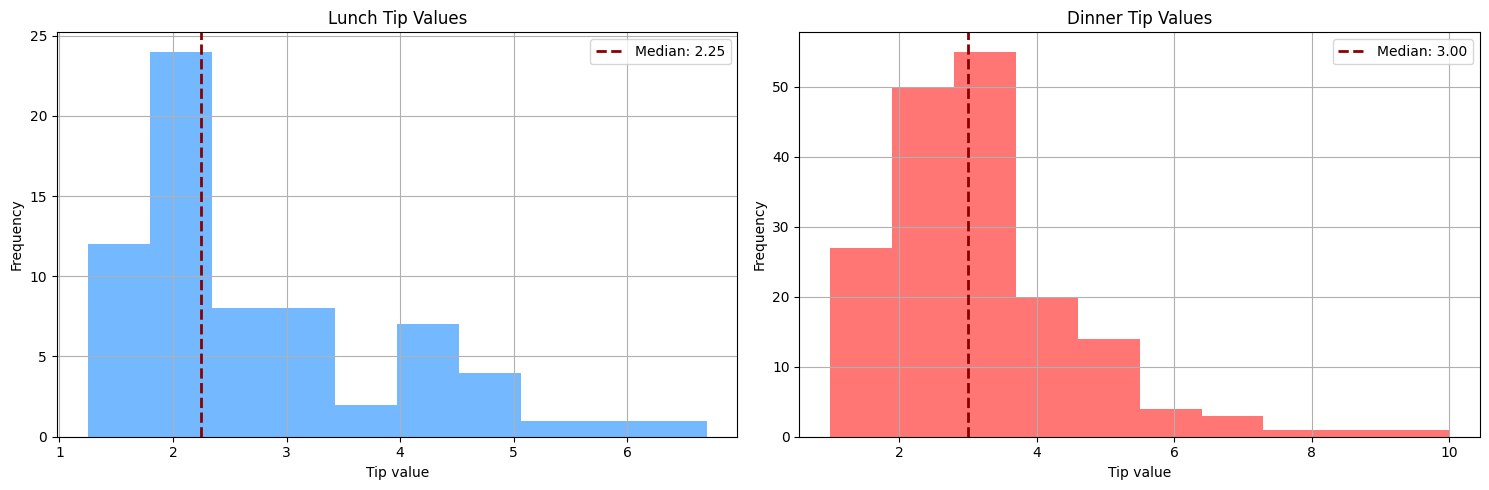

In [121]:
plt.figure(figsize=(15, 5)) # Adjust figure size for two plots

plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
plt.hist(lunch_df['tip'], color='#74b9ff')
plt.axvline(lunch_tip_median, color='darkred', linestyle='dashed', linewidth=2, label=f'Median: {lunch_tip_median:.2f}')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Lunch Tip Values')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
plt.hist(dinner_df['tip'], color='#ff7675') # Using a different color for Dinner
plt.axvline(dinner_tip_median, color='darkred', linestyle='dashed', linewidth=2, label=f'Median: {dinner_tip_median:.2f}')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Dinner Tip Values')
plt.grid(True)
plt.legend()

plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

##### **📝 Conclusion**

**Insights based on measures of central tendency and distribution comparison:**

* * *

1. Insight 1:

Mean and median tips for dinner are significantly higher than for lunch.

2. Insight 2:

The maximum tip for dinner is much higher than for lunch.

3. Insight 3:

Both are right-skewed, but the dinner tip distribution extends to higher values.

**General conclusion:**

Dinner service generally receives higher average tips and has a greater potential for larger tips compared to lunch.